# Test Load and Draw Boxes

In [1]:
import glob
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import xml.etree.ElementTree as ET
from random import randint
import random

In [4]:
# 1. READ TXT FILE TO LIST
def file_lines_to_list(path):
    # open txt file lines to a list
    with open(path) as f:
        content = f.readlines()
    # remove whitespace characters like `\n` at the end of each line
    content = [(x.strip()).split() for x in content]
    return content
# ------------------------

# 2. GET FILE NAME FROM PATH
def get_file_name(path):
    basename = os.path.basename(path)
    onlyname = os.path.splitext(basename)[0]
    return onlyname
# ------------------------

In [3]:
image_src = glob.glob("../datasets/waymo/val_samples/*.jpg")
anno_src = glob.glob("../datasets/waymo/val_samples/*.txt")
print(len(image_src), len(anno_src))

50 50


val00-1-14-2-FRONT_LEFT


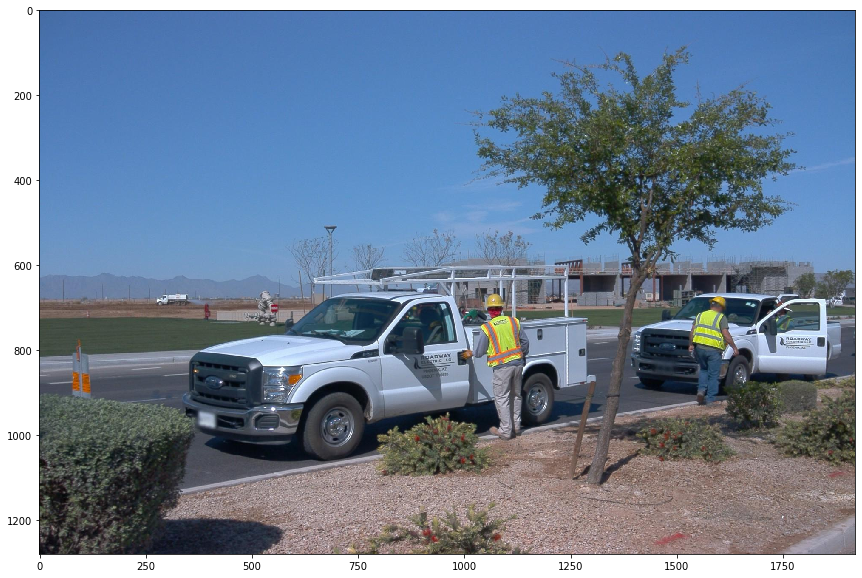

In [96]:
index = randint(0, len(image_src)-1)
img_name = get_file_name(image_src[index])
print(img_name)
image = plt.imread(f"../datasets/waymo/val_samples/{img_name}.jpg")
plt.figure(figsize=(16,10))
plt.imshow(image)

In [97]:
contents = file_lines_to_list(f"../datasets/waymo/val_samples/{img_name}.txt")
for content in contents:
    print(content)

['1', '0.556589', '0.654781', '0.091449', '0.274840']
['0', '0.990387', '0.539812', '0.019226', '0.016777']
['0', '0.165792', '0.534878', '0.040461', '0.032073']
['0', '0.973372', '0.534878', '0.024014', '0.016777']
['1', '0.827646', '0.629123', '0.064475', '0.207734']
['0', '0.977320', '0.529943', '0.024014', '0.016777']
['0', '0.628629', '0.530930', '0.017435', '0.014803']
['0', '0.920740', '0.532904', '0.025329', '0.011842']
['1', '0.907253', '0.608399', '0.032237', '0.150496']
['0', '0.852975', '0.615800', '0.257570', '0.185530']
['0', '0.429284', '0.650340', '0.511522', '0.364151']
['0', '0.481587', '0.506752', '0.016119', '0.011842']
['0', '0.950675', '0.539812', '0.033224', '0.016777']


In [98]:
img_w = 1920
img_h = 1280

obj_boxes = []
for content in contents:
    x1 = int(float(content[1])*img_w - float(content[3])*img_w/2)
    y1 = int(float(content[2])*img_h - float(content[4])*img_h/2)
    x2 = int(float(content[1])*img_w + float(content[3])*img_w/2)
    y2 = int(float(content[2])*img_h + float(content[4])*img_h/2)
     
    obj_boxes.append([int(content[0]), x1, y1, x2, y2])
    
obj_boxes = np.array(obj_boxes)
obj_boxes

array([[   1,  980,  662, 1156, 1014],
       [   0, 1883,  680, 1920,  701],
       [   0,  279,  664,  357,  705],
       [   0, 1845,  673, 1891,  695],
       [   1, 1527,  672, 1650,  938],
       [   0, 1853,  667, 1899,  689],
       [   0, 1190,  670, 1223,  689],
       [   0, 1743,  674, 1792,  689],
       [   1, 1710,  682, 1772,  875],
       [   0, 1390,  669, 1884,  906],
       [   0,  333,  599, 1315, 1065],
       [   0,  909,  641,  940,  656],
       [   0, 1793,  680, 1857,  701]])

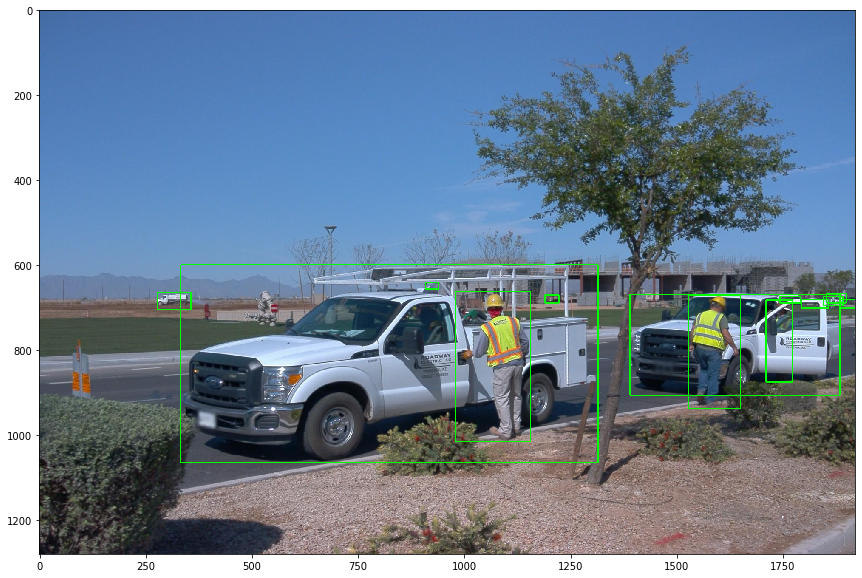

In [99]:
dummy = image.copy()
for obj in obj_boxes:
    true_person_img = cv2.rectangle(dummy, (int(obj[1]), int(obj[2])), (int(obj[3]), int(obj[4])), (0, 255, 0), thickness = 2)
                                                               
plt.figure(figsize = (15, 10))
plt.imshow(true_person_img)
plt.show()

# Print Out XML File

In [100]:
import os
import os.path as osp

from xml.etree.ElementTree import Element, SubElement
from xml.etree import ElementTree
from xml.dom import minidom

In [101]:
def prettify(elem):
    """Return a pretty-printed XML string for the Element.
        """
    rough_string = ElementTree.tostring(elem, 'utf-8')
    reparsed = minidom.parseString(rough_string)
    return reparsed.toprettyxml(indent="\t")

In [122]:
image_src = glob.glob("../datasets/waymo/val_samples/*.jpg")
anno_src = glob.glob("../datasets/waymo/val_samples/*.txt")
print(len(image_src), len(anno_src))

50 50


In [123]:
img_w = 1920
img_h = 1280
obj_name = ["vehicle", "pedestrian", "cyclist"]

for path in anno_src:
    contents = file_lines_to_list(path)
    img_name = get_file_name(path)
        
    obj_boxes = []
    for content in contents:
        x1 = int(float(content[1])*img_w - float(content[3])*img_w/2)
        y1 = int(float(content[2])*img_h - float(content[4])*img_h/2)
        x2 = int(float(content[1])*img_w + float(content[3])*img_w/2)
        y2 = int(float(content[2])*img_h + float(content[4])*img_h/2)

        obj_boxes.append([int(content[0]), x1, y1, x2, y2])

    obj_boxes = np.array(obj_boxes)

    if len(obj_boxes) > 0:
        annotation = Element('annotation')
        SubElement(annotation, 'filename').text = img_name + ".jpg"

        for obj in obj_boxes:    
            object_ = Element('object')
            SubElement(object_, 'name').text = obj_name[obj[0]]

            bndbox = Element('bndbox')
            SubElement(bndbox, 'xmin').text = str(obj[1])
            SubElement(bndbox, 'ymin').text = str(obj[2])
            SubElement(bndbox, 'xmax').text = str(obj[3])
            SubElement(bndbox, 'ymax').text = str(obj[4])

            object_.append(bndbox)
            annotation.append(object_)

        # Write XML
        with open(osp.join(f"../datasets/waymo/xml_samples/{img_name}.xml"), 'w') as f:
            f.write(prettify(annotation))